In [35]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from janitor import clean_names

In [36]:
# Path
path = "../"

# Read the data
df = pd.read_csv(path + "output/ZX05/PL fix costs.csv")
df = clean_names(df)

# Change data type
df["costctr"] = df["costctr"].astype(str)

In [37]:
# Filter primary costs
primary_costs = [
    "PE production",
    "PE materials management",
    "PE plant administration",
]
df = df[df["race_item"].isin(primary_costs)]

In [38]:
# Select columns
id_cols = [
    "costctr",
    "gl_accounts",
    "profitctr",
    "fix_var_cc",
    "department",
    "acc_lv2",
    "bu",
    "division",
    "plant_name",
    "outlet_name",
    "ce_text",
    "race_item",
]
numeric_cols = [
    "plan",
    "actual",
    # "target",
    "delta_to_plan",
]
df = df[id_cols + numeric_cols]

In [39]:
# Change sign logic
df[numeric_cols] = df[numeric_cols] * -1e3
df["delta_to_plan"] = df["delta_to_plan"] * -1

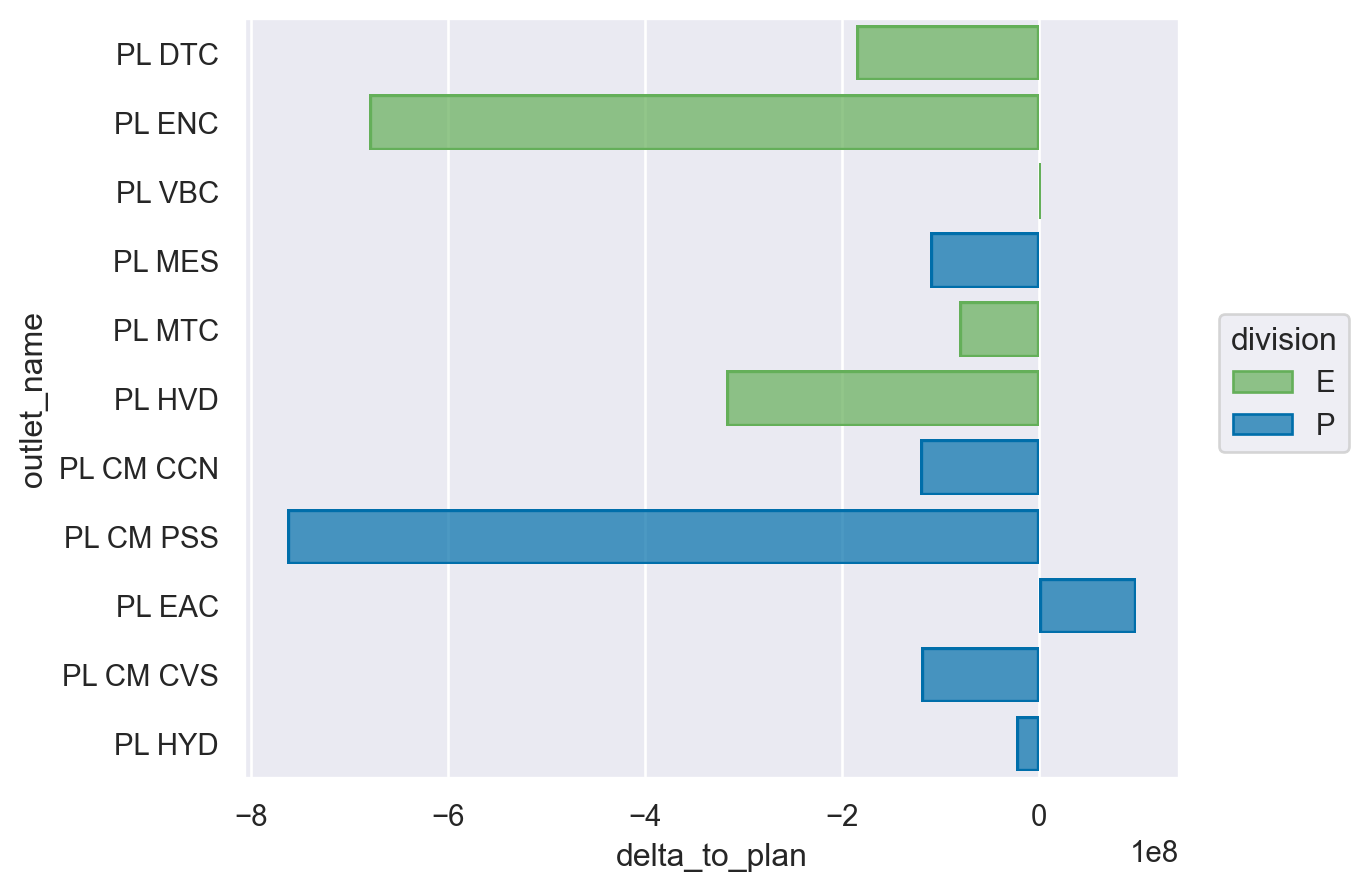

In [40]:
(
    so.Plot(df, x="delta_to_plan", y="outlet_name", color="division")
    .add(so.Bar(), so.Agg("sum"), so.Stack())
    .scale(color=("#64AF59", "#006EAA"))
)

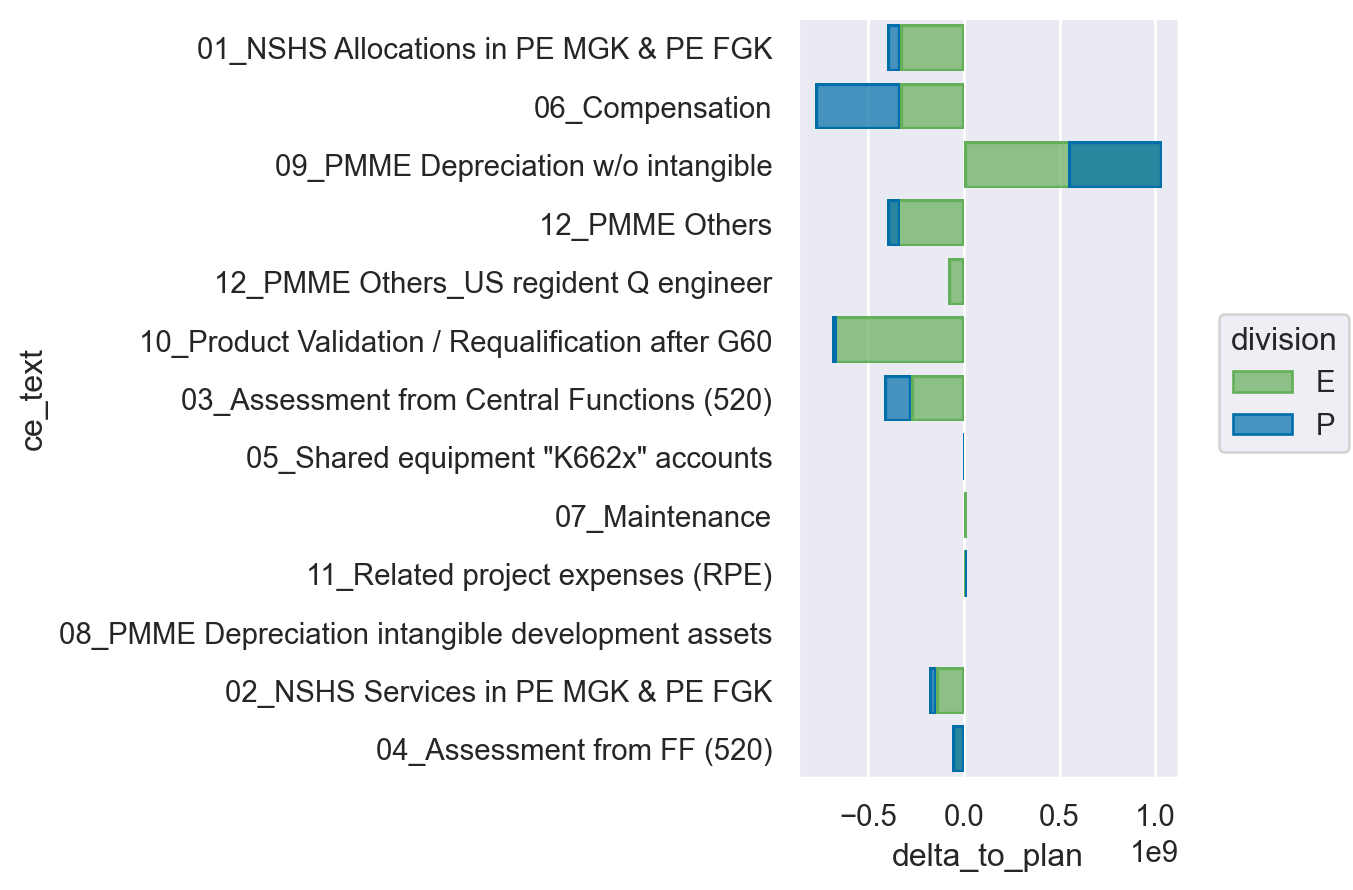

In [41]:
(
    so.Plot(df, x="delta_to_plan", y="ce_text", color="division")
    .add(so.Bar(), so.Agg("sum"), so.Stack())
    .scale(color=("#64AF59", "#006EAA"))
)

In [42]:
# Summarize the data
df = df.groupby(id_cols).sum().reset_index()

top_10_negative = df.sort_values("delta_to_plan").head(10)
top_10_positive = df.sort_values("delta_to_plan").tail(10)